In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cvx

from matplotlib import cm




<font size="6"><b>Regression</b></font>

Table of Contents
<div id="toc"></div>

The goal is to make quantitative (real valued) predictions on the basis of a (vector of) features or attributes

# 1. Linear Regression

Begin by considering linear regression (easy to extend to more comlex predictions later on)

$\text{Given} \; \begin{cases}
x_{i} \; \text{: inputs} \\
y_{i} \; \text{: outputs}
\end{cases}$
, Find $\theta_{1}$ and $\theta_{2}$


$$x=
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{m}
\end{bmatrix}, \qquad
y=
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{m}
\end{bmatrix} \approx
\hat{y}_{i} = \theta_{1}x_{i} + \theta_{2} $$

- $ \hat{y}_{i} $ : predicted output 

- $ \theta = 
\begin{bmatrix}
\theta_{1} \\
\theta_{2} \\
\end{bmatrix}
$ : Model parameters

$$ \hat{y}_{i} = f(x_{i}, \theta) \; \text{ in general}$$

- in many cases, a linear model to predict $y_{i}$ used


$$ \hat{y}_{i} = \theta_{1}x_{i} + \theta_{2} \; \text{  such that  } \min\limits_{\theta_{1}, \theta_{2}}\sum\limits_{i = 1}^{m} (\hat{y}_{i} - y_{i})^2$$

<br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr>
        <td width = 400 style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/linear_regression02.jpg", width = 300>
        </td>       
        <td width = 400>
            <img src="./image_files/linear_regression.png", width = 300>

        </td>
    </tr>
</table>

## 1.1. Re-cast problem as a least squares

- For convenience, we define a function that maps inputs to feature vectors, $\phi$

$$\begin{array}{Icr}\begin{align*} \hat{y}_{i}
& = \begin{bmatrix}x_{i} & 1\end{bmatrix}\begin{bmatrix}\theta_{1} \\ \theta_{2}\end{bmatrix} \\
& =\begin{bmatrix}x_{i} \\1\end{bmatrix}^{T}\begin{bmatrix}\theta_{1} \\ \theta_{2}\end{bmatrix} \\
& =\phi^{T}(x_{i})\theta
\end{align*}\end{array}
\begin{array}{Icr}
\quad \quad \text{feature vector}
\; \phi(x_{i}) = \begin{bmatrix}x_{i} \\1\end{bmatrix}
\end{array}$$

<br>

$$\Phi = \begin{bmatrix}x_{1} & 1 \\x_{2} & 1 \\ \vdots \\x_{m} & 1 \end{bmatrix}=\begin{bmatrix}\phi(x_{1})^T \\\phi(x_{2})^T \\\vdots \\\phi(x_{m})^T \end{bmatrix} \quad \implies \quad \hat{y} = \begin{bmatrix}\hat{y}_{1} \\\hat{y}_{2} \\\vdots \\\hat{y}_{m}\end{bmatrix}=\Phi\theta$$

<br>
- optimization problem

$$\min\limits_{\theta_{1}, \theta_{2}}\sum\limits_{i = 1}^{m} (\hat{y}_{i} - y_{i})^2
=\min\limits_{\theta}\lVert\Phi\theta-y\rVert^2_2
\qquad \qquad  (\text{same as} \; \min_{x} \lVert Ax-b \rVert_2^2)$$

$$ \text{solution} \;
\theta^* = (\Phi^{T}\Phi)^{-1}\Phi^{T}y
$$

<font size='4'><b>Note</b></font>

$$\begin{array}{Icr} \text{input} \\ x_{i} \end{array}
\quad \rightarrow \quad
\begin{array}{Icr} \text{feature} \\ \begin{bmatrix}x_{i} \\1 \end{bmatrix} \end{array}
\quad \rightarrow \quad
\begin{array}{Icr} \text{predicted output} \\ \hat{y}_{i} \end{array}$$

<br>

$$\begin{array}{Icr}
\begin{bmatrix}x_{1} & 1 \\x_{2} & 1\\\vdots & \vdots\\x_{m} & 1\end{bmatrix}\begin{bmatrix}\theta_1\\\theta_2\end{bmatrix}=\begin{bmatrix}y_{1} \\y_{2} \\\vdots \\y_{m}\end{bmatrix} \\
\begin{array}{Icr} \uparrow \\ \vec{a}_1 \end{array}
\;\;
\begin{array}{Icr} \uparrow \\ \vec{a}_2 \end{array}
\quad
\begin{array}{Icr} \uparrow \\ \vec{x} \end{array}
\quad\quad \;\;
\begin{array}{Icr} \uparrow \\ \vec{b} \end{array}
\end{array}
\quad
\begin{array}{Icr}
\quad \text{over-determined or} \\
\quad \text{projection}
\end{array}$$

<br>

$$A(= \Phi) = \left[ \vec{a}_1 \;\vec{a}_2 \right]$$

## 1.2. Single Variable Linear Regression

### 1) use a linear algebra
- known as _least square_

$$ \theta = (A^TA)^{-1}A^T y $$

In [2]:
# data points in column vector input, output
x = np.array([[0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]]).transpose()
y = np.array([[0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]]).transpose()

m = y.shape[0]
A = np.concatenate((x,np.ones((m,1))),1)

#theta = LA.inv(A.transpose().dot(A)).dot(A.transpose()).dot(y)


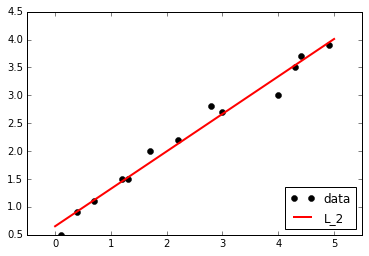

In [3]:
%matplotlib inline

theta = LA.inv(A.transpose().dot(A)).dot(A.transpose()).dot(y)

#to plot
plt.plot(x, y, 'ko')
xp2 = np.linspace(0, 5, 500)
yp2 = theta[0]*xp2 + theta[1]


plt.plot(xp2, yp2, 'r-', linewidth = 2)

plt.axis('equal')
plt.legend(['data', 'L_2'], loc = 4)
plt.show()

### 2) use CVX optimization (least squared)

$$  \min_{\theta} ~ \lVert \hat y - y \rVert_2  =  \min_{\theta} ~ \lVert A\theta - y \rVert_2  $$

[[ 0.67129519]
 [ 0.65306531]]


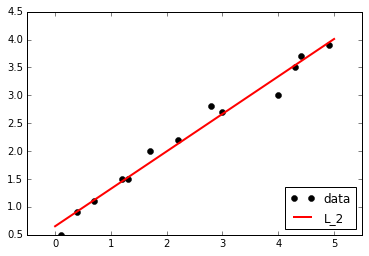

In [4]:
%matplotlib inline
#only for python2
#optimiza theta  use norm 1

theta2 = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm2(A*theta2 - y))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()
print(theta2.value)

#to plot
plt.plot(x, y, 'ko')
xp2 = np.linspace(0, 5, 500)
yp2 = theta2[0].value*xp2 + theta2[1].value


plt.plot(xp2, yp2, 'r-', linewidth = 2)

plt.axis('equal')
plt.legend(['data', 'L_2'], loc = 4)
plt.show()

### BTW, do we have to use only $L_2$ norm? No.
- Let's use $L_1$ norm

[[ 0.68531634]
 [ 0.62587346]]


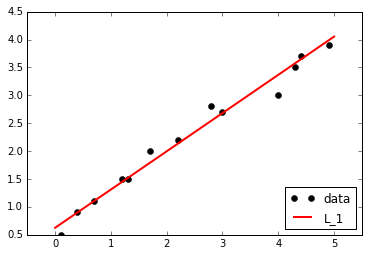

In [5]:
%matplotlib inline
#only for python2
#optimiza theta  use norm 1

theta1 = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm1(A*theta1 - y))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()
print(theta1.value)

#to plot
plt.plot(x, y, 'ko')
xp1 = np.linspace(0, 5, 500)
yp1 = theta1[0].value*xp1 + theta1[1].value


plt.plot(xp1, yp1, 'r-', linewidth = 2)

plt.axis('equal')
plt.legend(['data', 'L_1'], loc = 4)
plt.show()

$L_1$ norm also provides a decent linear approximation. __What if outliers exist?__

- fitting with the different norms
- Discuss the result
- it is important to understand what makes them different.


- source:
    - Week 9 of Computational Methods for Data Analysis by Coursera of Univ. of Washingon
    - Chapter 17, online book [available](http://courses.washington.edu/amath582/582.pdf)

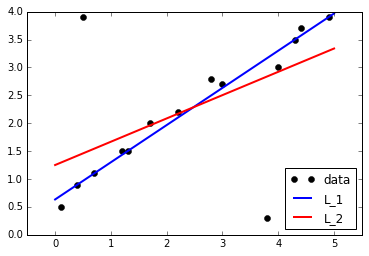

In [6]:
%matplotlib inline
#only for python2
#optimiza theta  use norm 1

x= np.array([[0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]]).transpose()
y = np.array([[0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]]).transpose()

#add outliers
x = np.concatenate((x,np.array([[0.5], [3.8]])))
y = np.concatenate((y,np.array([[3.9], [0.3]])))

m = y.shape[0]
A = np.concatenate((x,np.ones((m,1))),1)

#use norm1

theta1 = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm1(A*theta1 - y))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()

#to plot
plt.plot(x, y, 'ko')
xp1 = np.linspace(0, 5, 500)
yp1 = theta1[0].value*xp1 + theta1[1].value


#use norm2

theta2 = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm2(A*theta2 - y))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()


plt.plot(xp1, yp1, 'b-', linewidth = 2)

xp2 = np.linspace(0, 5, 500)
yp2 = theta2[0].value*xp2 + theta2[1].value


plt.plot(xp2, yp2, 'r-', linewidth = 2)
plt.axis('equal')
plt.legend(['data', 'L_1', 'L_2'], loc = 4)
plt.show()

## 1.3. Multivariate Linear Regression (linear regression for multivariate data)

<br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr>
        <td width = 400 style="border-style: hidden; border-collapse: collapse;">
            $$ \hat{y}_{i} = \theta_{1}x_1 + \theta_{2}x_2 + \theta_3$$

$$\phi(x_{i}) = \begin{bmatrix}x_{1i}\\x_{2i} \\1\end{bmatrix}$$
        </td>       
        <td width = 400>
            <img src="./image_files/multi_regression.png", width = 300>
        </td>
    </tr>
</table>

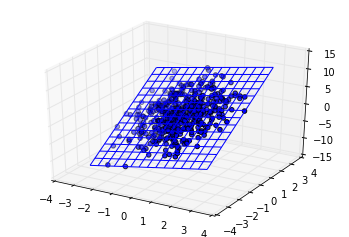

In [7]:
%matplotlib inline
# Data Generation
from mpl_toolkits.mplot3d import Axes3D

n = 500

x1 = np.random.randn(n,1)
x2 = np.random.randn(n,1)

real_theta1 = 1;
real_theta2 = 3;
real_theta3 = 2;

e = 0.5*np.random.randn(n,1)
y = real_theta1*x1 + real_theta2*x2 + e

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y)


A = np.concatenate((x1, x2, np.ones((n,1))), 1)
theta = LA.inv(A.transpose().dot(A)).dot(A.transpose()).dot(y)

[X1, X2] = np.meshgrid(np.linspace(np.min(x1), np.max(x1), 15),
                      np.linspace(np.min(x2), np.max(x2), 15))

yhat = theta[0]*X1 + theta[1]*X2 + theta[2]
ax.plot_wireframe(X1, X2, yhat, cmap = cm.coolwarm)
plt.show()


# 2. Nonlinear Regression (Linear Regression for non-linear data set)

<br>
<img src = "./image_files/nonlinear2.png", width = 300>

- same as linear regression, just with non-linear features
- method 1: constructing explicit feature vectors
    - polynomial features
    - Radial basis function (<font color='red'>RBF</font>) features
- method 2: implicit feature vectors, <font color='red'>kernels</font> (_optional_)


- polynomial (here, quad is used as an example)

$$
\begin{align*}
y &= \theta_1x^2 + \theta_2x + \theta_3 + \text{noise}
\end{align*}
$$

$$\phi(x_{i}) = \begin{bmatrix}x_{i}^2\\x_{i} \\1\end{bmatrix}$$

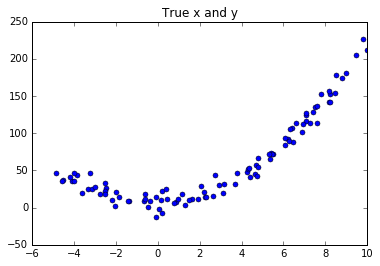

In [8]:
%matplotlib inline

# y = theta(1)x + theta(2)x^2 + theta(3) + noise

n = 100 # number of data points

x = -5 + 15*np.random.rand(n,1)

real_theta1 = 2
real_theta2 = 1
real_theta3 = 10

noise = 8*np.random.randn(n,1);

y = real_theta1*x**2 + real_theta2*x + real_theta3 + noise

plt.plot(x, y, 'o', markersize = 5)
plt.title('True x and y')
plt.show()
%matplotlib inline

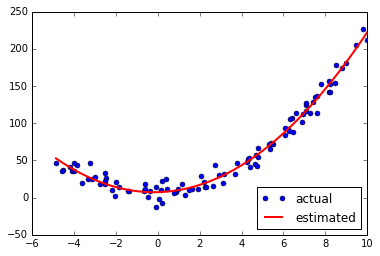

In [9]:
%matplotlib inline

A = np.concatenate((x**2, x, np.ones((n, 1))), 1)
theta = LA.inv(np.dot(A.transpose(),A)).dot(A.transpose()).dot(y)

xpt = np.linspace(np.min(x),np.max(x))
ypt = theta[0]*(xpt**2) + theta[1]*xpt + theta[2]

plt.plot(x, y, 'bo', markersize = 5)
plt.plot(xpt, ypt, 'r', linewidth = 2)
plt.legend(['actual', 'estimated'], loc = 4)
plt.show()


## Example: overfitting

This is a very important m-file that you might want to fully understand or even memorize

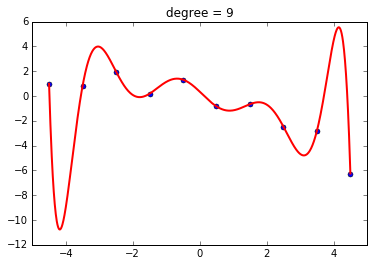

In [10]:
%matplotlib inline

x = [x_cont/10. for x_cont in range(-45,46,10)]
x = np.array([x])
y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

x = x.transpose()
y = y.transpose()

xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
xpt = np.array([xpt]).transpose()

n_x = x.shape[0] # # of x date
n_xpt = xpt.shape[0]

Phi = np.zeros((n_x, 10))
polybasis = np.zeros((n_xpt, 10))

for i in range(0,10):
    Phi[:, i] = x[:, 0]**i
    polybasis[:, i] = xpt[:, 0]**i
    
theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)
ypt = polybasis.dot(theta)


plt.plot(x, y, 'bo', markersize = 5)
plt.plot(xpt, ypt, 'r', linewidth = 2)
plt.axis([-5, 5, -12, 6])
plt.title("degree = 9")
plt.show()


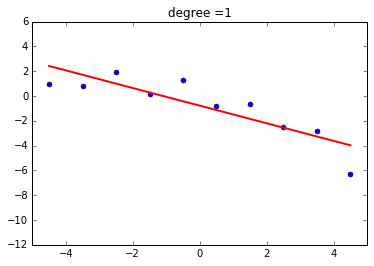

In [11]:
%matplotlib inline

def plot_overfiting_poly(m=1):
    x = [x_cont/10. for x_cont in range(-45,46,10)]
    x = np.array([x])
    y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

    x = x.transpose()
    y = y.transpose()

    xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
    xpt = np.array([xpt]).transpose()

    n_x = x.shape[0] # num of x date
    n_xpt = xpt.shape[0]

    poly_num = m+1
    
    
    Phi = np.zeros((n_x, poly_num))
    polybasis = np.zeros((n_xpt, poly_num))

    for i in range(0,poly_num):
        Phi[:, i] = x[:, 0]**i
        polybasis[:, i] = xpt[:, 0]**i
        
    theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)
    ypt = polybasis.dot(theta)
    
    plt.plot(x, y, 'bo', markersize = 5)
    plt.plot(xpt, ypt, 'r', linewidth = 2)
    plt.axis([-5, 5, -12, 6])  
    title = 'degree =%s' % str(m)  
    plt.title(title)
    plt.show()
    

from IPython.html.widgets import interact
interact(plot_overfiting_poly, m=[0, 9, 1]);


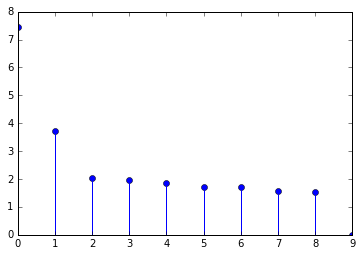

In [12]:
%matplotlib inline

x = [x_cont/10. for x_cont in range(-45,46,10)]
x = np.array([x])
y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

x = x.transpose()
y = y.transpose()

xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
xpt = np.array([xpt]).transpose()

n_x = x.shape[0] # num of x date
n_xpt = xpt.shape[0]


RSS = []

for m in range(0, 10):

    poly_num = m+1
    
    Phi = np.zeros((n_x, poly_num))
    polybasis = np.zeros((n_xpt, poly_num))

    for i in range(0,poly_num):
        Phi[:, i] = x[:, 0]**i
        polybasis[:, i] = xpt[:, 0]**i
    
    
    theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)
    ypt = polybasis.dot(theta)
    
    RSS.append(LA.norm(y - Phi.dot(theta),2))
   

plt.stem(RSS) 
plt.show()

# 3. Linear Basis Function Models

- Construct explicit feature vectors

- Consider linear combinations of fixed nonlinear functions of the input variables, of the form

$$ \hat{y}=\sum_{i=0}^d{\theta_i \phi_i(x)} = \Phi \theta$$

1) Polynomial functions

$$\phi_i(x) = x^i, \quad i = 0,\cdots,d$$

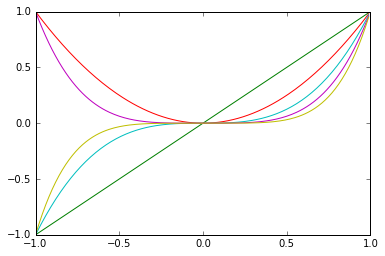

In [13]:
%matplotlib inline

xpt = [num/100. for num in range(-100,100,1)]
xpt = np.array([xpt])
xpt = xpt.transpose()

polybasis_num = xpt.shape[0]
polybasis = np.zeros((polybasis_num, 6))

for i in range(0,6):
    polybasis[:, i] = xpt[:,0]**i

plt.plot(xpt, polybasis)
plt.show()


2) RBF functions with bandwidth $\sigma$ and $k$ RBF centers $\mu_i \in \mathbb{R}^n$

$$ \phi_i(x) =  \exp \left( - \frac{\lVert x-\mu_i \rVert^2}{2\sigma^2}\right) $$

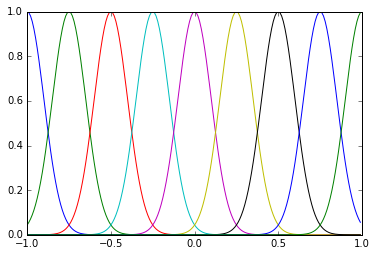

In [14]:
%matplotlib inline

xpt = [num/100. for num in range(-100,100,1)]
xpt = np.array([xpt])
xpt = xpt.transpose()

# num of RBF
d = 9
# sigma of RBF
sigma = 0.1

u = np.array(np.linspace(-1, 1, d))

rbfbasis_num = xpt.shape[0]
rbfbasis = np.zeros((rbfbasis_num, d))


for i in range(0,d):
    rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]

plt.plot(xpt, rbfbasis)
plt.show()



- With many features, our prediction function becomes very expenssive

- Can lead to overfitting (low error on input data points, but high error nearby)

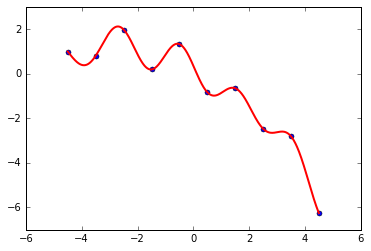

In [15]:
%matplotlib inline

# data generate
x = [x_cont/10. for x_cont in range(-45,46,10)]
x = np.array([x])
y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

x = x.transpose()
y = y.transpose()

xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
xpt = np.array([xpt]).transpose()


# number of RBF
d = 10
u = np.array(np.linspace(-4.5, 4.5, d))
# sigma of RBF
sigma = 1

Phi_x = x.shape[0]
Phi = np.zeros((Phi_x, d))

rbfbasis_num = xpt.shape[0]
rbfbasis = np.zeros((rbfbasis_num, d))

for i in range(0,d):
    Phi[:, i] = np.exp((-(x-u[i])**2)/(2*sigma**2))[:,0]
    rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]

theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)

ypt = rbfbasis.dot(theta)

plt.plot(x, y, 'bo', markersize = 5)
plt.plot(xpt, ypt, 'r', linewidth = 2)
plt.show() 



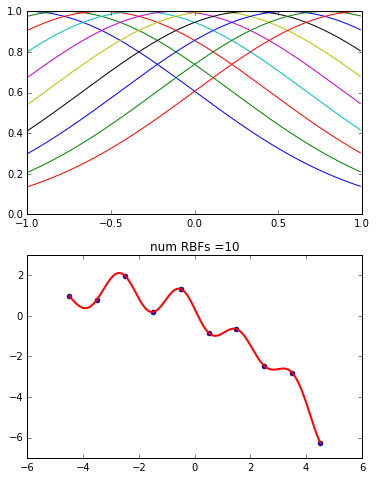

In [16]:
def RBF_plot(sigma = 1, numRBF = 10):
    #data generate
    x = [x_cont/10. for x_cont in range(-45,46,10)]
    x = np.array([x])
    y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

    x = x.transpose()
    y = y.transpose()
    
    xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
    xpt = np.array([xpt]).transpose()
    
    #num of RBF
    numRBF = numRBF
    u = np.array(np.linspace(-4.5, 4.5, numRBF))
    #sigma of RBF
    sigma = sigma
    
 
    xpt_RBF = [num/100. for num in range(-100,100,1)]
    xpt_RBF = np.array([xpt_RBF]).transpose()
    u_RBF_graph = np.array(np.linspace(-1, 1, numRBF))


    Phi_x = x.shape[0]
    Phi = np.zeros((Phi_x, numRBF))

    rbfbasis_num = xpt.shape[0]
    rbfbasis = np.zeros((rbfbasis_num, numRBF))
    

    rbfbasis_RBF_n = xpt_RBF.shape[0]
    rbfbasis_RBF = np.zeros((rbfbasis_RBF_n, numRBF))
    
    for i in range(0, numRBF):
        Phi[:, i] = np.exp((-(x-u[i])**2)/(2*sigma**2))[:,0]
        rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]

        rbfbasis_RBF[:, i] = np.exp((-(xpt_RBF-u_RBF_graph[i])**2)/(2*sigma**2))[:,0]

    theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)    
    ypt = rbfbasis.dot(theta)
    
    plt.subplot(2,1,1)

    plt.plot(xpt_RBF, rbfbasis_RBF)
    plt.xlim([-1.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.subplot(2,1,2)
    
    title = 'num RBFs =%s' % str(numRBF)
    plt.title(title)
    plt.plot(x, y, 'bo', markersize = 5)
    plt.plot(xpt, ypt, 'r', linewidth = 2)
    plt.xlim([-6.0, 6.0])
    plt.ylim([-7.0, 3.0])
    plt.show()
    

%pylab inline
pylab.rcParams['figure.figsize'] = (6, 8)
from IPython.html.widgets import interact
interact(RBF_plot, sigma=[0, 10, 0.1], numRBF=[0, 10, 1]);

# 4. Regularization (Shrinkage methods)

Often, overfitting associated with very large estimated parameters $\theta$

We want to balance

- how well function fits data

- magnitude of coefficients
<br><br>
$$
\begin{align*}
\text{Total cost} = \;&\underbrace{\text{measure of fit}}_{RSS(\theta)}  + \;\lambda \cdot \underbrace{\text{measure of magnitude of coefficients}}_{\lambda \cdot \lVert \theta \rVert_2^2} \\ \\
\implies &\min\; \lVert \Phi \theta - y \rVert_2^2 + \lambda \lVert \theta \rVert_2^2
\end{align*}
$$
<br>
  where $ RSS(\theta) = \lVert \Phi\theta - y \rVert^2_2 $, ( = Rresidual Sum of Squares) and $\lambda$ is a tuning parameter to be determined separately

<br>
- the second term, $\lambda \cdot \lVert \theta \rVert_2^2$, called a shrinkage penalty, is small when $\theta_1, \cdots,\theta_d$ are close to zeros, and so it has the effect of shrinking the estimates of $\theta_j$ towards zero


- The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates


- known as a _ridge regression_

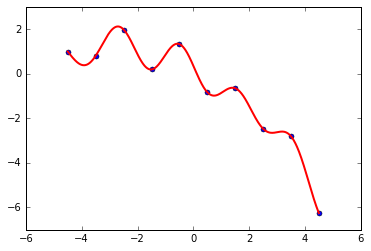

In [17]:
%matplotlib inline

#data generate
x = [x_cont/10. for x_cont in range(-45,46,10)]
x = np.array([x])
y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

x = x.transpose()
y = y.transpose()

xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
xpt = np.array([xpt]).transpose()

#num of RBF
d = 10
u = np.array(np.linspace(-4.5, 4.5, d))
#sigma of RBF
sigma = 1


Phi_n = x.shape[0]
Phi = np.zeros((Phi_n, d))

rbfbasis_num = xpt.shape[0]
rbfbasis = np.zeros((rbfbasis_num, d))


for i in range(0, d):
    Phi[:, i] = np.exp((-(x-u[i])**2)/(2*sigma**2))[:,0]
    rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]
    

#theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)

theta = cvx.Variable(d)
objective = cvx.Minimize(cvx.norm2(Phi*theta-y))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()

ypt = rbfbasis.dot(theta.value)


plt.plot(x, y, 'bo', markersize = 5)
plt.plot(xpt, ypt, 'r', linewidth = 2)
plt.show() 

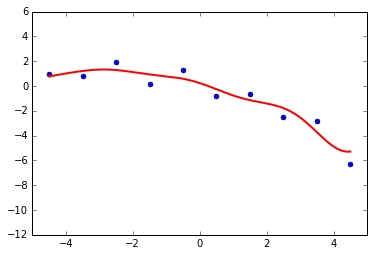

In [18]:
%matplotlib inline

#data generate
x = [x_cont/10. for x_cont in range(-45,46,10)]
x = np.array([x])
y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

x = x.transpose()
y = y.transpose()

xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
xpt = np.array([xpt]).transpose()


d = 10;
u = np.array(np.linspace(-4.5, 4.5, d))
sigma = 1


Phi_x = x.shape[0]
Phi = np.zeros((Phi_x, d))

rbfbasis_num = xpt.shape[0]
rbfbasis = np.zeros((rbfbasis_num, d))

for i in range(0, d):
    Phi[:, i] = np.exp((-(x-u[i])**2)/(2*sigma**2))[:,0]
    rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]
    
theta = cvx.Variable(d)

lambda_regul = 0.1

objective = cvx.Minimize(cvx.sum_squares(Phi*theta-y) + lambda_regul*cvx.sum_squares(theta) )
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()

ypt = rbfbasis.dot(theta.value)


plt.plot(x, y, 'bo', markersize = 5)
plt.plot(xpt, ypt, 'r', linewidth = 2)
plt.axis([-5, 5, -12, 6])
plt.show() 

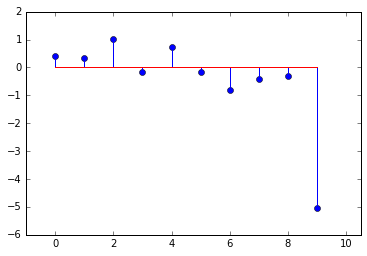

In [19]:
%matplotlib inline

plt.stem(theta.value)
plt.xlim([-1.0, 10.5])
plt.show()

# 5. Sparsity for feature selection using Lasso

- Least Squares with a penalty on the $L_1$-norm of the parameters
- start with full model (all possible features)
- "Shrink" some coefficients exactly to 0
    - _i.e._, knock out certain features
    - the $\mathscr{l}_1$ penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero
- Non-zero coefficients indicate "selected" features

Try this cost instead of ridge...
<br><br>
$$
\begin{align*}
\text{Total cost} = \;&\underbrace{\text{measure of fit}}_{RSS(\theta)}  + \;\lambda \cdot \underbrace{\text{measure of magnitude of coefficients}}_{\lambda \cdot \lVert \theta \rVert_1} \\ \\
\implies &\min\; \lVert \Phi \theta - y \rVert_2^2 + \lambda \lVert \theta \rVert_1
\end{align*}$$
<br>

- $\lambda$ is a tuning parameter = balance of fit and sparsity

<br>
- Another equivalent forms of optimizations


$$
\begin{array}{Icr}\begin{align*}
\min_{\theta} \quad
& \lVert \Phi \theta - y \rVert_2^2 \\
\text{subject to} \quad
& \lVert \theta \rVert_1 \leq s
\end{align*}\end{array}
\quad\quad\quad\quad
\begin{array}{I}
\min_{\theta} \quad
& \lVert \Phi \theta - y \rVert_2^2 \\
\text{subject to} \quad
& \lVert \theta \rVert_2^2 \leq s
\end{array}
$$


<br>
<img src="./image_files/lasso_picture.png", width=500>

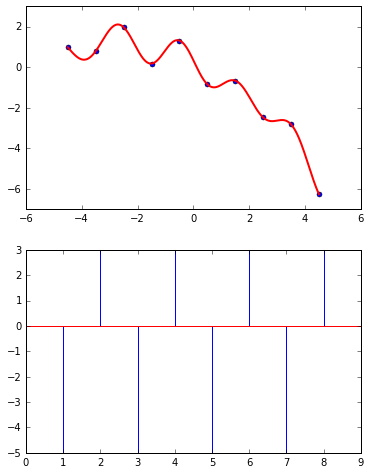

In [20]:
def Regularization(Lambda = 0.1, norm = 1):
    lambda_regul = Lambda
    
    x = [x_cont/10. for x_cont in range(-45,46,10)]
    x = np.array([x])
    y = np.array([[0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]])

    x = x.transpose()
    y = y.transpose()

    xpt = [xpt_cont/100. for xpt_cont in range(-450,451)]
    xpt = np.array([xpt]).transpose()


    d = 10;
    u = np.array(np.linspace(-4.5, 4.5, d))

    sigma = 1

    #공간 생성
    Phi_x = x.shape[0]
    Phi = np.zeros((Phi_x, d))

    rbfbasis_num = xpt.shape[0]
    rbfbasis = np.zeros((rbfbasis_num, d))

    for i in range(0, d):
        Phi[:, i] = np.exp((-(x-u[i])**2)/(2*sigma**2))[:,0]
        rbfbasis[:, i] = np.exp((-(xpt-u[i])**2)/(2*sigma**2))[:,0]

    #theta = (LA.inv(Phi.transpose().dot(Phi))).dot(Phi.transpose()).dot(y)

    theta = cvx.Variable(d)
    
    objective = cvx.Minimize(cvx.sum_squares(Phi*theta-y) + lambda_regul*cvx.norm(theta, norm) )
    constraints = []
    prob = cvx.Problem(objective, constraints)
    result = prob.solve()

    ypt = rbfbasis.dot(theta.value)

    plt.subplot(2, 1, 1)
    plt.plot(x, y, 'bo', markersize = 5)
    plt.plot(xpt, ypt, 'r', linewidth = 2)
    
    plt.subplot(2, 1, 2)
    plt.stem(theta.value)
    plt.ylim([-5.0,3.0])
    plt.show() 
    

%pylab inline
pylab.rcParams['figure.figsize'] = (6, 8)
from IPython.html.widgets import interact
interact(Regularization, Lambda=[0, 5, 0.1], norm=[1, 2 ,1]);

# 6. Implicit Feature Vectors: Kernels (Optional)

- One of the main trends in machine learning in the past 15 years
- Kernels let us work in high-dimensional feature spaces without explicitly constructing the feature vector
- This method will resolve the computational difficulty of constructing feature vectors

```octave
function m = sqdist(p, q)

% SQDIST        Squared Euclidean or Mahalanobis distance.
% SQDIST(p,q)   returns m(i,j) = (p(:,i) - q(:,j))'*(p(:,i) - q(:,j)).

pn = size(p,2);
qn = size(q,2);

m = zeros(pn,qn);

for i = 1:pn
    for j = 1:qn
        m(i,j) = (p(:,i) - q(:,j))'*(p(:,i) - q(:,j));
    end
end
```


In [21]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>